In [91]:
import pandas as pd

In [92]:
# Nombre de los archivos csv a unir
nombre_archivos = ['larepublica', 'semana', 'laSillaVacia']

revistas = ['La República', 'Semana', 'La Silla Vacía']

In [93]:
# Se crea un diccionario con dataframes y nombres de las columnas de estos
inf_revistas = {}
columns = []
for i, nom in enumerate(nombre_archivos):
    inf_revistas[revistas[i]] = {'dataFrame': pd.read_csv(f'../data/raw/{nom}.csv', encoding='latin-1')}
    # inf_revistas[revistas[i]]['Columns'] = inf_revistas[revistas[i]]['dataFrame'].columns.to_list()
    # columns += inf_revistas[revistas[i]]['Columns']

# Se crea una lista con las columnas que aparecen en todos los archivos    
# columns = list(set(columns))

In [94]:
# Se agregan las columnas faltantes a cada uno de los df
# y una columna de la fuente que se extrajo la info
for i in revistas:
    n = len(inf_revistas[i]['dataFrame'])
#     for j in columns:
#         if j not in inf_revistas[i]['Columns']:
#             inf_revistas[i]['dataFrame'][j] = [None]*n
    inf_revistas[i]['dataFrame']['Fuente'] = [i]*n

# columns.append('Fuente')

In [95]:
# Se crea un df consolidado con todas las nombre_archivos
dataframes = []
for i in revistas:
    dataframes.append(inf_revistas[i]['dataFrame'])
    
df = pd.concat(dataframes, axis=0, ignore_index=True)

In [132]:
df.to_csv(f'../data/raw/consolidado.csv')

In [131]:
df.tail()

,Fecha Extraccion,Titulo,Fecha Publicacion,Tema,Resumen,URL,Imagen,Empresa,Autor,Contenido,RelNewsUrls,Fuente,Tags
52,2023-01-26 12:25:24,"""Presidente de Ecopetrol en la crisis más grav...",2022-10-30 00:00:00,NaN,NaN,http://www.lasillavacia.com/la-silla-vacia/det...,NaN,ecopetrol,NaN,NaN,NaN,La Silla Vacía,NaN
53,2023-01-26 12:25:24,"Lo que tiene que ver Petro, y lo que no, con e...",2022-10-30 00:00:00,NaN,NaN,https://www.lasillavacia.com/historias/silla-n...,NaN,ecopetrol,La Silla Vacía,NaN,NaN,La Silla Vacía,NaN
54,2023-01-26 12:25:24,La estrategia de Duque para blindar a Ecopetro...,2022-10-30 00:00:00,NaN,NaN,https://www.lasillavacia.com/historias/silla-n...,https://www.lasillavacia.com/media/640x480/asa...,ecopetrol,Nohora Celedón,En las últimas semanas el gobierno ha hecho do...,NaN,La Silla Vacía,NaN
55,2023-01-26 12:25:24,La última jugadita del gobierno sobre Ecopetrol,2022-10-30 00:00:00,NaN,NaN,https://www.lasillavacia.com/historias/histori...,https://www.lasillavacia.com/media/640x480/kat...,ecopetrol,Katherine Casas Perez,"Al presidente, Iván Duque, le quedan cuatro me...",NaN,La Silla Vacía,NaN
56,2023-01-26 12:25:24,Ecopetrol: 70 años de retos que continúan,2022-10-30 00:00:00,NaN,NaN,https://www.lasillavacia.com/historias/histori...,https://www.lasillavacia.com/media/640x480/kat...,ecopetrol,Katherine Casas Perez,"Ecopetrol, la empresa petrolera más grande de ...",NaN,La Silla Vacía,NaN


# Estadística descriptiva

In [99]:
import pandas as pd
import seaborn as sns

import fuzzywuzzy
from fuzzywuzzy import process

In [143]:
temas = df['Tema'].unique()
temas

array(['BOLSAS', 'ENERGÍA', 'LABORAL', 'INDUSTRIA', 'COMERCIO',
       'ANALISTAS', 'SIN TEMA', 'Bvc', 'Ecopetrol', 'Inversionistas',
       'Finanzas', 'Petróleo', nan], dtype=object)

In [146]:
def freq_feature(df, string):
    try:
        return sns.countplot(x=df[string]).set_xticklabels(labels=df[string].unique(), rotation=90);
    except:
        print("Es probable que hayan celdas vacías")

Es probable que hayan celdas vacías


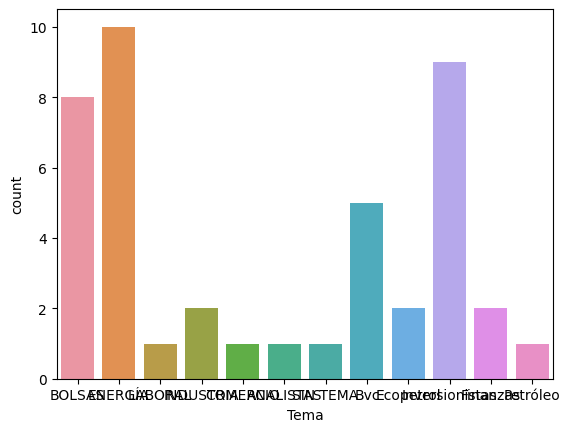

In [147]:
freq_feature(df, "Tema");

In [148]:
freq_feature(df, "Fecha Publicacion");

Es probable que hayan celdas vacías


C:\Users\andres.ospina\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:645: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  g_vals = grouped_vals.get_group(g)
